In [1]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [7]:
data = wine.data
label = wine.target
columns = wine.feature_names
print(data,'\n',label,'\n',columns)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [8]:
data = pd.DataFrame(data, columns=columns)
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [9]:
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2,random_state=2022)

In [12]:
x_train['flavanoids'].values.reshape(-1,1)[:5]
sim_lr = LinearRegression()
sim_lr.fit(x_train['flavanoids'].values.reshape((-1,1)),y_train)
y_pred = sim_lr.predict(x_test['flavanoids'].values.reshape((-1,1)))

In [13]:
print('Simple Linear Regression R2: {:4F}'.format(r2_score(y_test,y_pred)))

Simple Linear Regression R2: 0.809034


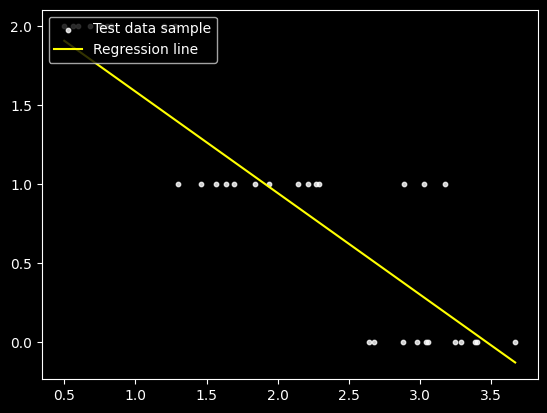

In [14]:
# 4. Result Visualization
line_x = np.linspace(np.min(x_test['flavanoids']),np.max(x_test['flavanoids']),10)
line_y = sim_lr.predict(line_x.reshape(-1,1))


plt.scatter(x_test['flavanoids'],y_test,s=10,c='white',alpha=0.8)
plt.plot(line_x,line_y,c='yellow')
plt.legend(['Test data sample','Regression line'], loc='upper left')

plt.savefig('my_figure.png')
plt.show()

In [15]:

# 5. Conclusion. 
# From the result, with the Number of room data is not enough to teach machine(dots are out of regression line)
# Using more data set is required to train the machine

# 6. Multiple Linear Regression
mul_lr = LinearRegression()

# Give much more info
mul_lr.fit(x_train,y_train) # differnt from sim_lr.fit(X_train['RM'].values.reshape((-1,1)),y_train)
y_pred2 = mul_lr.predict(x_test)

# Check Result
print('Multi Linear Regression R2: {:4F}'.format(r2_score(y_test,y_pred2)))


Multi Linear Regression R2: 0.869443
